### BB84 protocol.

#### Objective; Transfer K bits data from Alice to bob
https://en.wikipedia.org/wiki/BB84

In [24]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import *
import random 

def measure_and_count(circuit, N):
    for i in range(N):
        circuit.measure(i, i)
    sim = Aer.get_backend('aer_simulator')
    job = execute(circuit, sim)
    result = job.result()
    counts = result.get_counts()
    return counts

### Generate a k bit key for transfer using random choices python library.

In [25]:
KeyRandom = random.choices([0,1], k=25)
KeyToBeTransimtted = "".join([str(a) for a in KeyRandom])

print (KeyToBeTransimtted)

1101011110001001000000011


The following code, does the following. 

- Prepares the circuit with the key to be transmitted.
- Alice applies random bases and transmits the state ( for the example, we dont have a quantum communication channel, we use the same circuit as alice. )
- Bob applies random bases to the state received.
- At places, where bases were same, the measurement is compared for same bits for all possiblities and if its same, its used as the key. 
- At some point, bob receives all the bits. 

In [26]:

N = len(KeyToBeTransimtted)
BobFullKeyReceived = False 
BobsKey = [-1]*N
iterations = 0 
state = None

for i in range(2*N):
    QuantumBB84Circuit = QuantumCircuit(N,N)
    for idx, i in enumerate(KeyToBeTransimtted):
        if i == "1":
            QuantumBB84Circuit.x(idx)

    QuantumBB84Circuit.barrier()

    # Alice choses a basis randomly.
    alice_basis_choice = random.choices([0,1], k=N)
    for idx, c in enumerate(alice_basis_choice):
        if c == 1:
            QuantumBB84Circuit.h(idx)

    QuantumBB84Circuit.barrier()

    # Bob choses a basis randomly.
    bob_basis_choice = random.choices([0,1], k=N)
    for idx, c in enumerate(bob_basis_choice):
        if c == 1:
            QuantumBB84Circuit.h(idx)
            
    QuantumBB84Circuit.barrier()

    z = measure_and_count(QuantumBB84Circuit, N)
    
    ## publicly share alice and bob basis.
    reference = list(z.keys())
    reference = [k[::-1] for k in reference]

    def get_all_values_at_index(reference, bit_no): 
        ans = reference[0][bit_no]

        for i in range(1, len(reference)):
            if ans != reference[i][bit_no]:
                return -1
        
        return ans 

    for idx, (alice_choice, bob_choice) in enumerate(zip(alice_basis_choice, bob_basis_choice)):
        if alice_choice == bob_choice:
            ans = get_all_values_at_index(reference, idx)
            if BobsKey[idx] == -1 and ans != -1:
                BobsKey[idx] = ans

    iterations += 1

    state = QuantumBB84Circuit

    if -1 not in BobsKey:
        break

print("Alice key =>", KeyToBeTransimtted, "\nBobs  key =>", "".join(BobsKey), '\nretrieved in' , iterations, 'iterations')

Alice key => 1101011110001001000000011 
Bobs  key => 1101011110001001000000011 
retrieved in 7 iterations


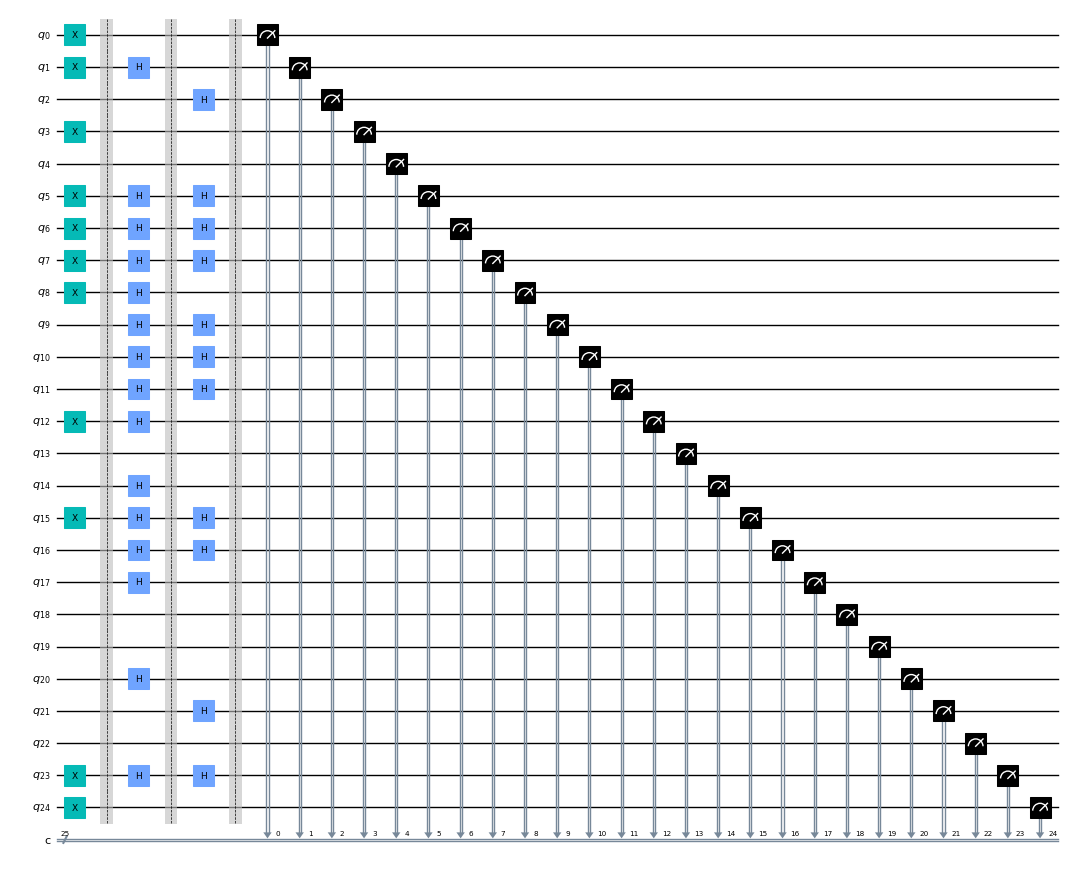

In [27]:
state.draw(output="mpl", scale=0.5, fold=1000)